# PRA 2: Creación de la visualización y entrega del proyecto 

# Análisis de los datos sobre la frontera Ucrania-Polonia

Estudiante: Daniel Arco Alonso


In [74]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Carga de los datos

In [11]:
df= pd.read_csv("border_traffic_UA_PL_01_03.csv")
print("Dimensiones del dataset: ", df.shape)
print(df.info())
df.head()


Dimensiones del dataset:  (54233, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54233 entries, 0 to 54232
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Border Guard Post               54233 non-null  object
 1   Border crossing                 54152 non-null  object
 2   Type of border crossing         54233 non-null  object
 3   Border Guard Unit               54233 non-null  object
 4   Date                            54233 non-null  object
 5   Direction to / from Poland      54233 non-null  object
 6   Citizenship (code)              54207 non-null  object
 7   UE / Schengen                   54233 non-null  object
 8   Number of persons (checked-in)  54233 non-null  int64 
 9   Number of people (evacuated)    54233 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 4.1+ MB
None


Border Guard Post    Border crossing Type of border crossing  \
0          Dorohusk  Dorohusk-Jagodzin                    road   
1          Dorohusk  Dorohusk-Jagodzin                    road   
2          Dorohusk  Dorohusk-Jagodzin                    road   
3          Dorohusk  Dorohusk-Jagodzin                    road   
4          Dorohusk  Dorohusk-Jagodzin                    road   

  Border Guard Unit        Date Direction to / from Poland Citizenship (code)  \
0       Nadbuzanski  2022-01-01          arrival in Poland                 BY   
1       Nadbuzanski  2022-01-01          arrival in Poland                 DE   
2       Nadbuzanski  2022-01-01          arrival in Poland                 TR   
3       Nadbuzanski  2022-01-01          arrival in Poland                 UA   
4       Nadbuzanski  2022-01-01          arrival in Poland                 LV   

  UE / Schengen  Number of persons (checked-in)  Number of people (evacuated)  
0             0                               7                             0  
1            UE                              29                             0  
2             0                               2                             0  
3             0                             389                             0  
4            UE                               3                             0

Inspeccionando los datos, podemos ver que hay 54233 registros con 10 columnas cada una. En esas 10 variables de estudio 2 de ellas, Border Crossing y Citizenship tienen registros con valores nulos. El resto de variables tienen información para todos los registros.

In [17]:
df.describe()

Number of persons (checked-in)  Number of people (evacuated)
count                    54233.000000                  54233.000000
mean                        78.063485                     33.785555
std                        681.611425                    312.917389
min                          0.000000                      0.000000
25%                          0.000000                      0.000000
50%                          1.000000                      0.000000
75%                          4.000000                      1.000000
max                      24662.000000                  13641.000000

Respecto a las variables numéricas, número de personas evacuadas y número de personas que realizaron el check-in, vemos como tienen un comportamiento normal. No hay valores negativos ni con decimales en nuestros registros. A un primer vistazo vemos que la media de personas que han realizado el check-in es más alta que el número de personas evacuadas. Lo que tiene sentido.u

Una vez explorado el juego de datos, vamos a analizar los valores nulos para ver si podemos rellenarlos con algun valor informativo, o debemos eliminar aquellos registros con valores nulos. Como hemos mencionado antes, los valores nulos venían de 2 variables solo: Border crossing y Citizenship (code). Empezaremos por Border Crossing.

In [20]:
nas_bordercr= df[df['Border crossing'].isna()]
nas_bordercr

Border Guard Post Border crossing Type of border crossing  \
34020            Medyka             NaN                    road   
34021            Medyka             NaN                    road   
34022          Korczowa             NaN                    road   
34023          Korczowa             NaN                    road   
34024          Dorohusk             NaN                    road   
...                 ...             ...                     ...   
34099          Lubaczow             NaN                    road   
34100          Hrebenne             NaN                    road   
34101            Medyka             NaN                    road   
34102          Hrebenne             NaN                    road   
34103          Korczowa             NaN                    road   

      Border Guard Unit        Date Direction to / from Poland  \
34020      Bieszczadzki  2022-01-25          arrival in Poland   
34021      Bieszczadzki  2022-01-25          arrival in Poland   
34022      Bieszczadzki  2022-01-28          arrival in Poland   
34023      Bieszczadzki  2022-02-05          arrival in Poland   
34024       Nadbuzanski  2022-02-12          arrival in Poland   
...                 ...         ...                        ...   
34099      Bieszczadzki  2022-02-21          arrival in Poland   
34100       Nadbuzanski  2022-02-22          arrival in Poland   
34101      Bieszczadzki  2022-02-22          arrival in Poland   
34102       Nadbuzanski  2022-02-22          arrival in Poland   
34103      Bieszczadzki  2022-02-23          arrival in Poland   

      Citizenship (code) UE / Schengen  Number of persons (checked-in)  \
34020                 US             0                               0   
34021                 CA             0                               0   
34022                 CA             0                               0   
34023                 CA             0                               0   
34024                 FR             0                               0   
...                  ...           ...                             ...   
34099                 US             0                               0   
34100                 UA             0                               0   
34101                 US             0                               0   
34102                 IE            UE                               0   
34103                 FI            UE                               0   

       Number of people (evacuated)  
34020                             6  
34021                             5  
34022                             2  
34023                             2  
34024                             4  
...                             ...  
34099                            64  
34100                            68  
34101                             2  
34102                             1  
34103                             4  

[81 rows x 10 columns]

In [34]:
print(nas_bordercr['Border Guard Post'].unique())
print(nas_bordercr['Type of border crossing'].unique())


['Medyka' 'Korczowa' 'Dorohusk' 'Hrebenne' 'Lubaczow']
['road']


Se observa como los puestos de Guardia que tienen valores nulos son Medyka, Korczowa, Dorohusk, Hrebenne, Lubaczow. La única vía de acceso con valores nulos es por carretera. Veremos a ver si con esta información podemos encontrar los valores de Border Crossing.

In [35]:
print(df[(df['Border Guard Post'] == 'Medyka') & (df['Type of border crossing'] == 'road')]["Border crossing"].unique())

['Medyka-Szeginie' nan]


Vemos como el único Border Crossing posible es 'Medyka-Szeginie' para los Guard Post de Medyka por carretera. Por lo tanto los valores nulos deberían de contener ese valor.

In [38]:
print(df[(df['Border Guard Post'] == 'Korczowa') & (df['Type of border crossing'] == 'road')]["Border crossing"].unique())
print(df[(df['Border Guard Post'] == 'Dorohusk') & (df['Type of border crossing'] == 'road')]["Border crossing"].unique())
print(df[(df['Border Guard Post'] == 'Hrebenne') & (df['Type of border crossing'] == 'road')]["Border crossing"].unique())
print(df[(df['Border Guard Post'] == 'Lubaczow') & (df['Type of border crossing'] == 'road')]["Border crossing"].unique())

['Korczowa-Krakowiec' nan]
['Dorohusk-Jagodzin' nan]
['Hrebenne-Rawa Ruska' nan]
['Budomierz-Hruszew' nan]


In [41]:
df_final = df

df_final.loc[(df_final['Border Guard Post'] == 'Medyka') & (df_final['Border crossing'].isna()),'Border crossing'] = 'Medyka-Szeginie'
df_final.loc[(df_final['Border Guard Post'] == 'Korczowa') & (df_final['Border crossing'].isna()),'Border crossing'] = 'Korczowa-Krakowiec'
df_final.loc[(df_final['Border Guard Post'] == 'Dorohusk') & (df_final['Border crossing'].isna()),'Border crossing'] = 'Dorohusk-Jagodzin'
df_final.loc[(df_final['Border Guard Post'] == 'Hrebenne') & (df_final['Border crossing'].isna()),'Border crossing'] = 'Hrebenne-Rawa Ruska'
df_final.loc[(df_final['Border Guard Post'] == 'Lubaczow') & (df_final['Border crossing'].isna()),'Border crossing'] = 'Budomierz-Hruszew'

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54233 entries, 0 to 54232
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Border Guard Post               54233 non-null  object
 1   Border crossing                 54233 non-null  object
 2   Type of border crossing         54233 non-null  object
 3   Border Guard Unit               54233 non-null  object
 4   Date                            54233 non-null  object
 5   Direction to / from Poland      54233 non-null  object
 6   Citizenship (code)              54207 non-null  object
 7   UE / Schengen                   54233 non-null  object
 8   Number of persons (checked-in)  54233 non-null  int64 
 9   Number of people (evacuated)    54233 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 4.1+ MB


Una vez asignados los valores que le corresponden a la columna Border Guard Post, procedemos a ver los valores nulos para Citizenship.

In [46]:
nas_citizen= df_final[df_final['Citizenship (code)'].isna()]
nas_citizen

Border Guard Post      Border crossing Type of border crossing  \
11719          Dorohusk    Dorohusk-Jagodzin                    road   
12730          Korczowa   Korczowa-Krakowiec                    road   
12899            Medyka    Przemysl-Mosciska                 railway   
12943            Medyka      Medyka-Szeginie                    road   
13609          Korczowa   Korczowa-Krakowiec                    road   
13746            Medyka    Przemysl-Mosciska                 railway   
13874            Medyka      Medyka-Szeginie                    road   
14416          Korczowa   Korczowa-Krakowiec                    road   
14651            Medyka      Medyka-Szeginie                    road   
16449       Dolhobyczow  Dolhobyczow-Uhrynow                    road   
16628        Hrubieszow        Zosin-Ustilug                    road   
17546          Korczowa   Korczowa-Krakowiec                    road   
35426          Dorohusk    Dorohusk-Jagodzin                    road   
35427          Dorohusk    Dorohusk-Jagodzin                    road   
35816          Korczowa   Korczowa-Krakowiec                    road   
36301            Medyka    Przemysl-Mosciska                 railway   
36302            Medyka    Przemysl-Mosciska                 railway   
36950          Korczowa   Korczowa-Krakowiec                    road   
37310            Medyka      Medyka-Szeginie                    road   
37428            Medyka    Przemysl-Mosciska                 railway   
38150          Korczowa   Korczowa-Krakowiec                    road   
38151          Korczowa   Korczowa-Krakowiec                    road   
38491            Medyka      Medyka-Szeginie                    road   
40643       Dolhobyczow  Dolhobyczow-Uhrynow                    road   
41817        Hrubieszow        Zosin-Ustilug                    road   
41913          Korczowa   Korczowa-Krakowiec                    road   

      Border Guard Unit        Date Direction to / from Poland  \
11719       Nadbuzanski  2022-02-26          arrival in Poland   
12730      Bieszczadzki  2022-02-27          arrival in Poland   
12899      Bieszczadzki  2022-02-27          arrival in Poland   
12943      Bieszczadzki  2022-02-27          arrival in Poland   
13609      Bieszczadzki  2022-02-28          arrival in Poland   
13746      Bieszczadzki  2022-02-28          arrival in Poland   
13874      Bieszczadzki  2022-02-28          arrival in Poland   
14416      Bieszczadzki  2022-03-01          arrival in Poland   
14651      Bieszczadzki  2022-03-01          arrival in Poland   
16449       Nadbuzanski  2022-03-03          arrival in Poland   
16628       Nadbuzanski  2022-03-04          arrival in Poland   
17546      Bieszczadzki  2022-03-05          arrival in Poland   
35426       Nadbuzanski  2022-02-26          arrival in Poland   
35427       Nadbuzanski  2022-02-26          arrival in Poland   
35816      Bieszczadzki  2022-02-27          arrival in Poland   
36301      Bieszczadzki  2022-02-27          arrival in Poland   
36302      Bieszczadzki  2022-02-27          arrival in Poland   
36950      Bieszczadzki  2022-02-28          arrival in Poland   
37310      Bieszczadzki  2022-02-28          arrival in Poland   
37428      Bieszczadzki  2022-02-28          arrival in Poland   
38150      Bieszczadzki  2022-03-01          arrival in Poland   
38151      Bieszczadzki  2022-03-01          arrival in Poland   
38491      Bieszczadzki  2022-03-01          arrival in Poland   
40643       Nadbuzanski  2022-03-03          arrival in Poland   
41817       Nadbuzanski  2022-03-04          arrival in Poland   
41913      Bieszczadzki  2022-03-05          arrival in Poland   

      Citizenship (code) UE / Schengen  Number of persons (checked-in)  \
11719                NaN             0                              19   
12730                NaN             0                               8   
12899                NaN             0                  

Se observa que los valores de NaN para las nacionalidades no presentan ningún tipo de patrón, por lo tanto, va a ser imposible deducir sus valores. Aún así, podemos ver que estos valores nulos en las nacionalidades solo se obtienen a partir del día 26 de Febrero y en llegadas a Polonia. Por lo tanto, se pue deducir que estos valores nulos son debido a la llegada masiva de personas a la frontera debido a la guerra. 

Como estos valores nulos pueden llegar a ser informativos, los mantendremos como están.

Finalmente crearemos 3 columnas nuevas que nos servirán en los análisis posteriores: El número total de personas que llegan a la frontera (check-in + evacuated) y una columna para el día y otra para el mes de llegada.

In [61]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final['Total arrived / departured'] = df_final['Number of persons (checked-in)'] + df_final['Number of people (evacuated)']
df_final['Month'] = pd.DatetimeIndex(df_final['Date']).month
df_final['Day'] = pd.DatetimeIndex(df_final['Date']).day

In [62]:
df_final.head(5)

Border Guard Post    Border crossing Type of border crossing  \
0          Dorohusk  Dorohusk-Jagodzin                    road   
1          Dorohusk  Dorohusk-Jagodzin                    road   
2          Dorohusk  Dorohusk-Jagodzin                    road   
3          Dorohusk  Dorohusk-Jagodzin                    road   
4          Dorohusk  Dorohusk-Jagodzin                    road   

  Border Guard Unit       Date Direction to / from Poland Citizenship (code)  \
0       Nadbuzanski 2022-01-01          arrival in Poland                 BY   
1       Nadbuzanski 2022-01-01          arrival in Poland                 DE   
2       Nadbuzanski 2022-01-01          arrival in Poland                 TR   
3       Nadbuzanski 2022-01-01          arrival in Poland                 UA   
4       Nadbuzanski 2022-01-01          arrival in Poland                 LV   

  UE / Schengen  Number of persons (checked-in)  Number of people (evacuated)  \
0             0                               7                             0   
1            UE                              29                             0   
2             0                               2                             0   
3             0                             389                             0   
4            UE                               3                             0   

   Total arrived / departured  Month  Day  
0                           7      1    1  
1                          29      1    1  
2                           2      1    1  
3                         389      1    1  
4                           3      1    1

## 2. Exploración y visualización de los datos

En esta sección pasaremos a la representación gráfica de nuestros datos. Así como la respuesta de las preguntas planteadas en la actividad anterior sobre esta práctica. Dichas cuestiones son: 

   1) ¿Cuál es el modo de llegada más común entre las diferentes fronteras Ucrania - Polonia? ¿Es la misma para cada frontera?
  
   2) ¿Cuáles son las nacionalidades con más pasajeros en los diferentes transportes? 
   
   3) ¿Cuál es la dinámica temporal de las llegadas y las salidas a Polonia? ¿Se mantienen en el tiempo o hay fluctuaciones? ¿Son iguales para cada tipo de transporte?
   
   4) ¿Son parecidas las dinámicas temporales en cada una de las nacionalidades?

### 2.1. Modo de llegada/salida más común

En primer lugar, compararemos los dos tipos de llegadas por tren y por carretera para ver qué modo de transporte es el más elegido en las diferentes fronteras Polonia - Ucrania. 

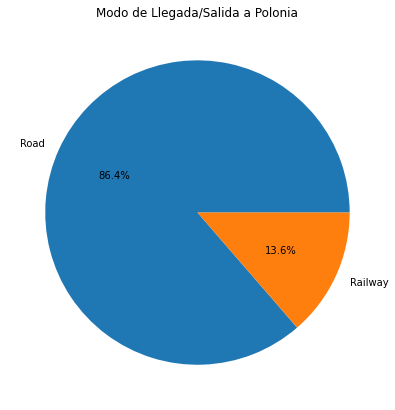

In [101]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.pie(df_final['Type of border crossing'].value_counts(), labels=labels, autopct='%1.1f%%')
ax.set_title('Modo de Llegada/Salida a Polonia');
plt.show()

También compararemos si el transporte predominante es igual para las llegadas y para las salidas. Para eso crearemos 2 dataframes, uno de llegadas y otro de salidas

In [79]:
arrivals = df_final[df_final['Direction to / from Poland'] == 'arrival in Poland']
arrivals_posts = arrivals.groupby('Border Guard Post').sum().sort_values('Total arrived / departured', ascending=False)
arrivals_posts.reset_index(level=0, inplace=True)
del(arrivals_posts["Month"])
del(arrivals_posts["Day"])


departures = df_final[df_final['Direction to / from Poland'] == 'departure from Poland']
departures_posts = departures.groupby('Border Guard Post').sum().sort_values('Total arrived / departured', ascending=False)
departures_posts.reset_index(level=0, inplace=True)
del(departures_posts["Month"])
del(departures_posts["Day"])


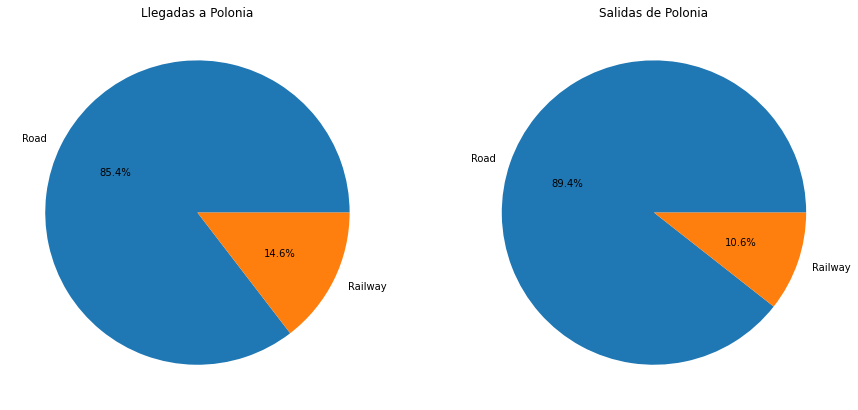

In [83]:
fig, axes = plt.subplots(1,2, figsize=(15,15))

# Labels
labels = ['Road', 'Railway']

axes[0].pie(arrivals['Type of border crossing'].value_counts(), labels=labels, autopct='%1.1f%%')
axes[0].set_title('Llegadas a Polonia');
axes[1].pie(departures['Type of border crossing'].value_counts(),labels=labels, autopct='%1.1f%%')
axes[1].set_title('Salidas de Polonia');

In [57]:
fig = px.parallel_categories(df_final,dimensions=['Border crossing', 'Type of border crossing'])
fig.show()

Con estos dos gráficos podemos ver que el modo de transporte elegido para cruzar la frontera es por carretera y en segundo lugar, en un puesto mucho más minoritario, vía tren. Aún así el tipo de transporte predominante cambia según la frontera donde nos encontremos.

Como vías de acceso por tren se observan 4 puntos fronterizos: Dorohusk-Jagodzin, Hrubieszow-Wlodzimierz Wolynski, Przemysl-Mosciska y Werchrata-Rawa Ruska, siendo estas tres últimas vías de acceso a Polonia solamente por tren. La mayor entrada por tren sería por la frontera Przemysl-Mosciska.

En el resto de fronteras la única vía de acceso es por carretera.

### 2.2 Nacionalidad de los pasajeros

Ahora, inspeccionaremos las nacionalidades de los pasajeros en los diferentes transportes. Primero echaremos un vistazo a las nacionalidades de los pasajeros sin tener en cuenta ningún otro factor. Primero veremos los 10 paises con mayor tráfico entre la frontera Ucrania Polonia, añadiendo el resto de nacionalidades a "Otros"

In [98]:
df_final['Citizenship (code)'].value_counts().head(10)
top_paises = list(df_final['Citizenship (code)'].value_counts().head(10).index)

df_nacionalidades = df_final
df_nacionalidades.loc[df_nacionalidades["Citizenship (code)"].isin(top_paises)==False, "Citizenship (code)"] = "other"
df_nacionalidades.head(6)

Border Guard Post    Border crossing Type of border crossing  \
0          Dorohusk  Dorohusk-Jagodzin                    road   
1          Dorohusk  Dorohusk-Jagodzin                    road   
2          Dorohusk  Dorohusk-Jagodzin                    road   
3          Dorohusk  Dorohusk-Jagodzin                    road   
4          Dorohusk  Dorohusk-Jagodzin                    road   
5          Dorohusk  Dorohusk-Jagodzin                    road   

  Border Guard Unit       Date Direction to / from Poland Citizenship (code)  \
0       Nadbuzanski 2022-01-01          arrival in Poland                 BY   
1       Nadbuzanski 2022-01-01          arrival in Poland                 DE   
2       Nadbuzanski 2022-01-01          arrival in Poland              other   
3       Nadbuzanski 2022-01-01          arrival in Poland                 UA   
4       Nadbuzanski 2022-01-01          arrival in Poland              other   
5       Nadbuzanski 2022-01-01          arrival in Poland              other   

  UE / Schengen  Number of persons (checked-in)  Number of people (evacuated)  \
0             0                               7                             0   
1            UE                              29                             0   
2             0                               2                             0   
3             0                             389                             0   
4            UE                               3                             0   
5            UE                               3                             0   

   Total arrived / departured  Month  Day  
0                           7      1    1  
1                          29      1    1  
2                           2      1    1  
3                         389      1    1  
4                           3      1    1  
5                           3      1    1

In [104]:
cats = df_final.groupby('Citizenship (code)').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)
fig = px.pie(cats, values='total', names='Citizenship (code)', title="Nacionalidad de las personas que cruzan la frontera")
fig.show()

In [102]:
road_df = df_final[df_final['Type of border crossing'] == 'road']
railway_df = df_final[df_final['Type of border crossing'] == 'railway']

In [106]:
cats = road_df.groupby('Citizenship (code)').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)
fig = px.pie(cats, values='total', names='Citizenship (code)', title="Nacionalidad de las personas que cruzan la frontera por carretera")
fig.show()

In [107]:
cats = railway_df.groupby('Citizenship (code)').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)
fig = px.pie(cats, values='total', names='Citizenship (code)', title="Nacionalidad de las personas que cruzan la frontera por tren")
fig.show()

Como se puede observar, hay una gran diferencia entre el porcentaje de ucranianos que cruzan la frontera Polonia - Ucrania mediante tren que con el resto de nacionalidades, incluida la Polaca. Era de esperar un aumento en el porcentaje de uso de tren en los paises de ucrania y polonia con respecto a los demás. Pero además, vemos como este aumento del porcentaje es muchomás notorio en los ciudadanos Ucranianos que en los Polacos. Esto se debe, posiblemente, a que el tren se ha usado mucho como modo de transporte para evacuar a personas durante la guerra. 

### 2.3 Dinámica temporal de las salidas/llegadas a Polonia.

Una vez extraida la información más general de nuestro dataset, procederemos a analizar el movimiento de personas entre la frontera Ucrania/Polonia teniendo en cuenta el factor tiempo.

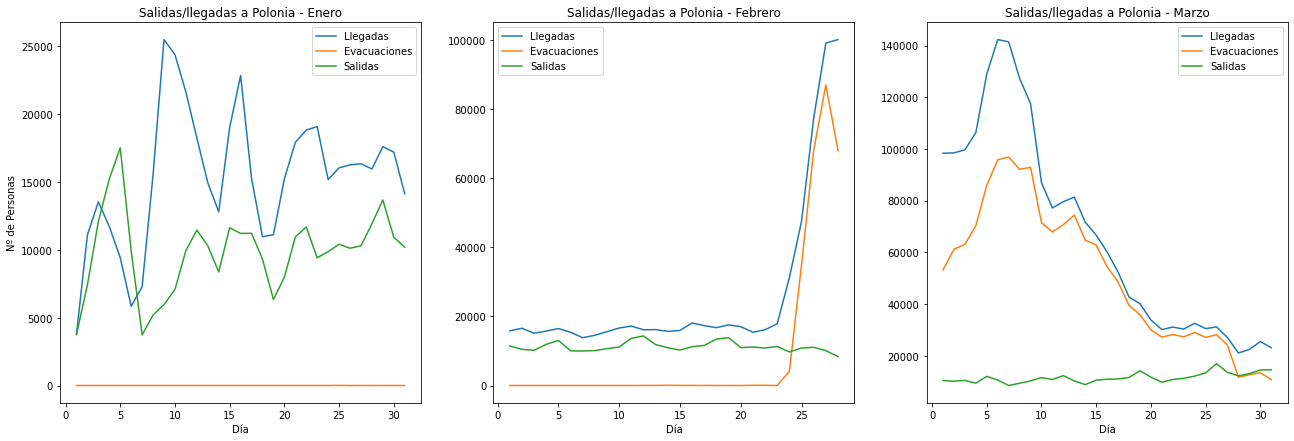

In [118]:
january_arrived = arrivals[arrivals['Month']==1]
january_departured = departures[departures['Month']==1]

february_arrived = arrivals[arrivals['Month']==2]
february_departured = departures[departures['Month']==2]

march_arrived = arrivals[arrivals['Month']==3]
march_departured = departures[departures['Month']==3]

fig, axes = plt.subplots(1, 3, figsize=(22,7));

# Enero
axes[0].plot(january_arrived.groupby('Day')['Number of persons (checked-in)'].sum())
axes[0].plot(january_arrived.groupby('Day')['Number of people (evacuated)'].sum())
axes[0].plot(january_departured.groupby('Day')['Number of persons (checked-in)'].sum())
axes[0].set_title('Salidas/llegadas a Polonia - Enero')
axes[0].set_xlabel('Día')
axes[0].set_ylabel('Nº de Personas')
axes[0].legend(['Llegadas', 'Evacuaciones', 'Salidas'])
# Febrero
axes[1].plot(february_arrived.groupby('Day')['Number of persons (checked-in)'].sum())
axes[1].plot(february_arrived.groupby('Day')['Number of people (evacuated)'].sum())
axes[1].plot(february_departured.groupby('Day')['Number of persons (checked-in)'].sum())
axes[1].set_title('Salidas/llegadas a Polonia - Febrero')
axes[1].set_xlabel('Día')
axes[1].legend(['Llegadas', 'Evacuaciones', 'Salidas'])
# Marzo
axes[2].plot(march_arrived.groupby('Day')['Number of persons (checked-in)'].sum())
axes[2].plot(march_arrived.groupby('Day')['Number of people (evacuated)'].sum())
axes[2].plot(march_departured.groupby('Day')['Number of persons (checked-in)'].sum())
axes[2].set_title('Salidas/llegadas a Polonia - Marzo')
axes[2].set_xlabel('Día')
axes[2].legend(['Llegadas', 'Evacuaciones', 'Salidas'])

plt.show()

Vemos como en enero el número de entradas y salidas se mantenía más o menos igualado, sin ninguna evacuación producida. A finales de febrero (24 - 28) se produce un pico de llegadas a Polonia donde gran parte de las llegadas son evacuaciones. Durante el mes de Marzo el número de personas evacuadas, y las llegadas a Polonia, van descendiendo lentamente hasta ponerse al mismo nivel que las salidas a finales de Marzo. Esto es debido a que el conflicto Ucrania - Rusia comenzó a finales de Febrero. Las personas que dejaron el país por la guerra, como podemos observar, dejaron el país lo antes posible, produciendo el pico de llegadas justo al inicio del conflicto. 

Como vemos, la dinámica temporal más interesantes de observar son las llegadas y las evacuaciones a Polonia. Ahora haremos dos gráficos de la dinámica temporal, solo llegadas a Polonia. Comparando los dos diferentes medios de transporte.

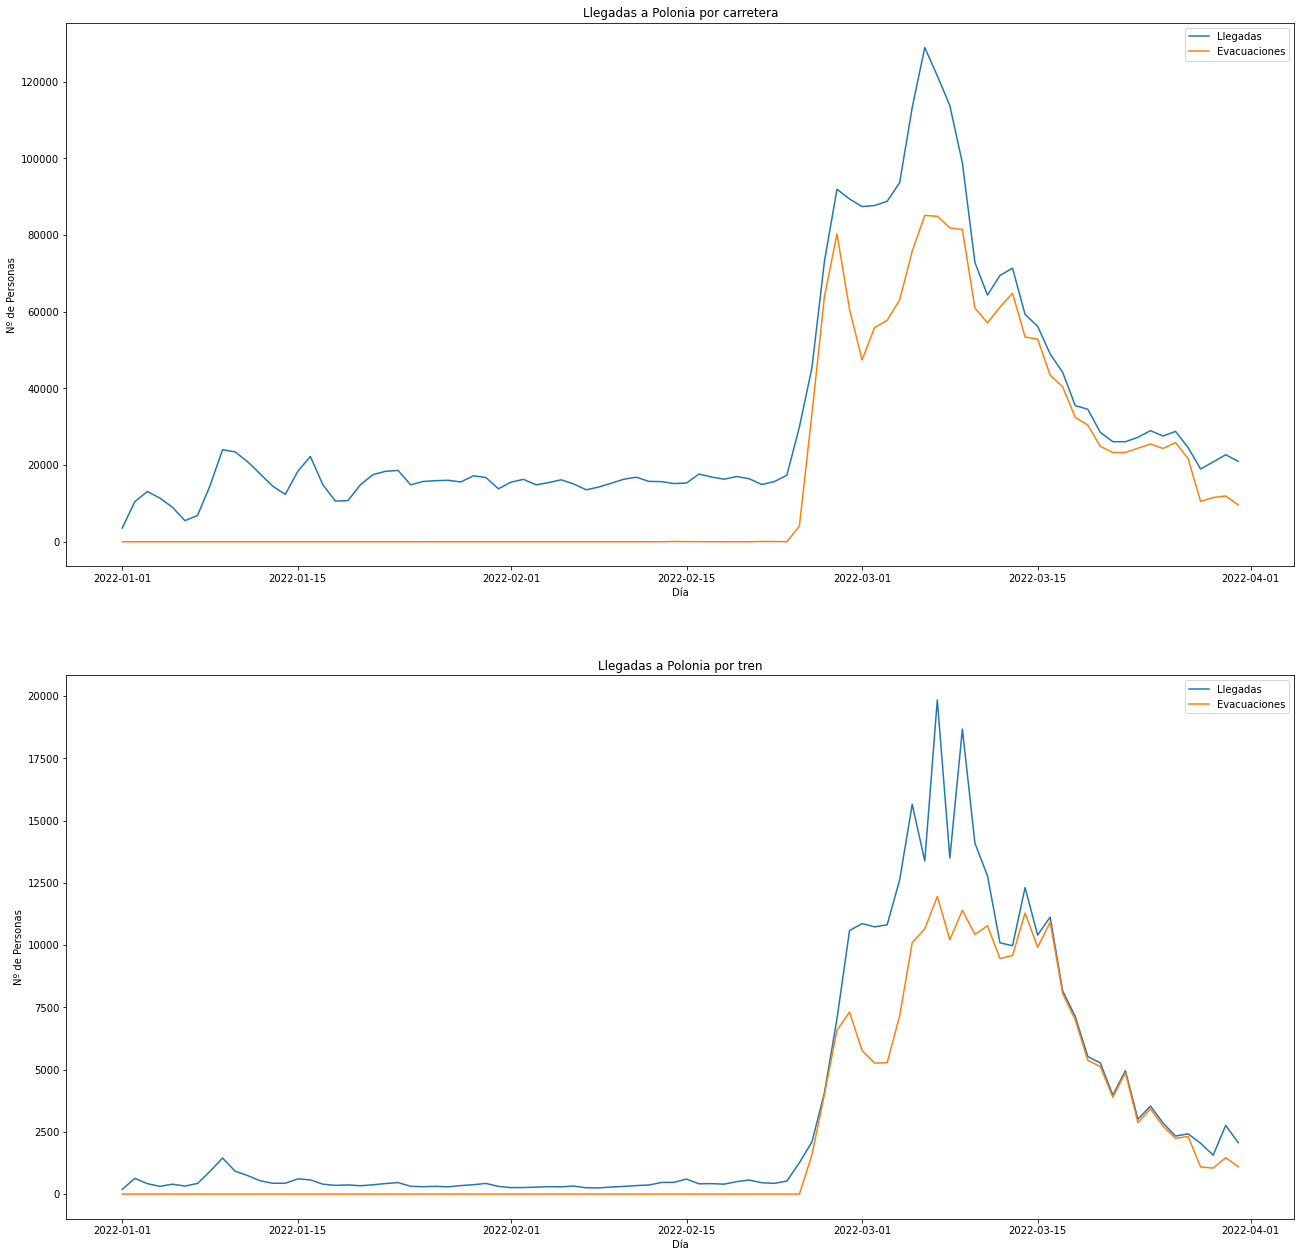

In [130]:
road_df_arrivals = arrivals[arrivals['Type of border crossing'] == 'road']
railway_df_arrivals = arrivals[arrivals['Type of border crossing'] == 'railway']

road_df_arrivals = road_df_arrivals[['Date', 'Number of people (evacuated)','Number of persons (checked-in)']].groupby('Date').sum().reset_index()
railway_df_arrivals = railway_df_arrivals[['Date', 'Number of people (evacuated)','Number of persons (checked-in)']].groupby('Date').sum().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(22,22));

#Por carretera
axes[0].plot(road_df_arrivals.groupby('Date')['Number of persons (checked-in)'].sum())
axes[0].plot(road_df_arrivals.groupby('Date')['Number of people (evacuated)'].sum())
axes[0].set_title('Llegadas a Polonia por carretera')
axes[0].set_xlabel('Día')
axes[0].set_ylabel('Nº de Personas')
axes[0].legend(['Llegadas', 'Evacuaciones'])

#Por tren
axes[1].plot(railway_df_arrivals.groupby('Date')['Number of persons (checked-in)'].sum())
axes[1].plot(railway_df_arrivals.groupby('Date')['Number of people (evacuated)'].sum())
axes[1].set_title('Llegadas a Polonia por tren')
axes[1].set_xlabel('Día')
axes[1].set_ylabel('Nº de Personas')
axes[1].legend(['Llegadas', 'Evacuaciones'])


plt.show()

Como podemos observar, la dinámica temporal de las llegadas entre los dos medios de transporte se mantiene muy similar. El aumento desmedido de llegadas se produce a finales de febrero, justo al inicio de la guerra. 

Un factor a destacar es que la proporción de personas evacuadas con las no evacuadas es siempre mayor en el tren que en carretera, menos en el momento donde el pico de llegadas se produce. 

### 2.4 Dinámica temporal de las salidas/llegadas a Polonia.

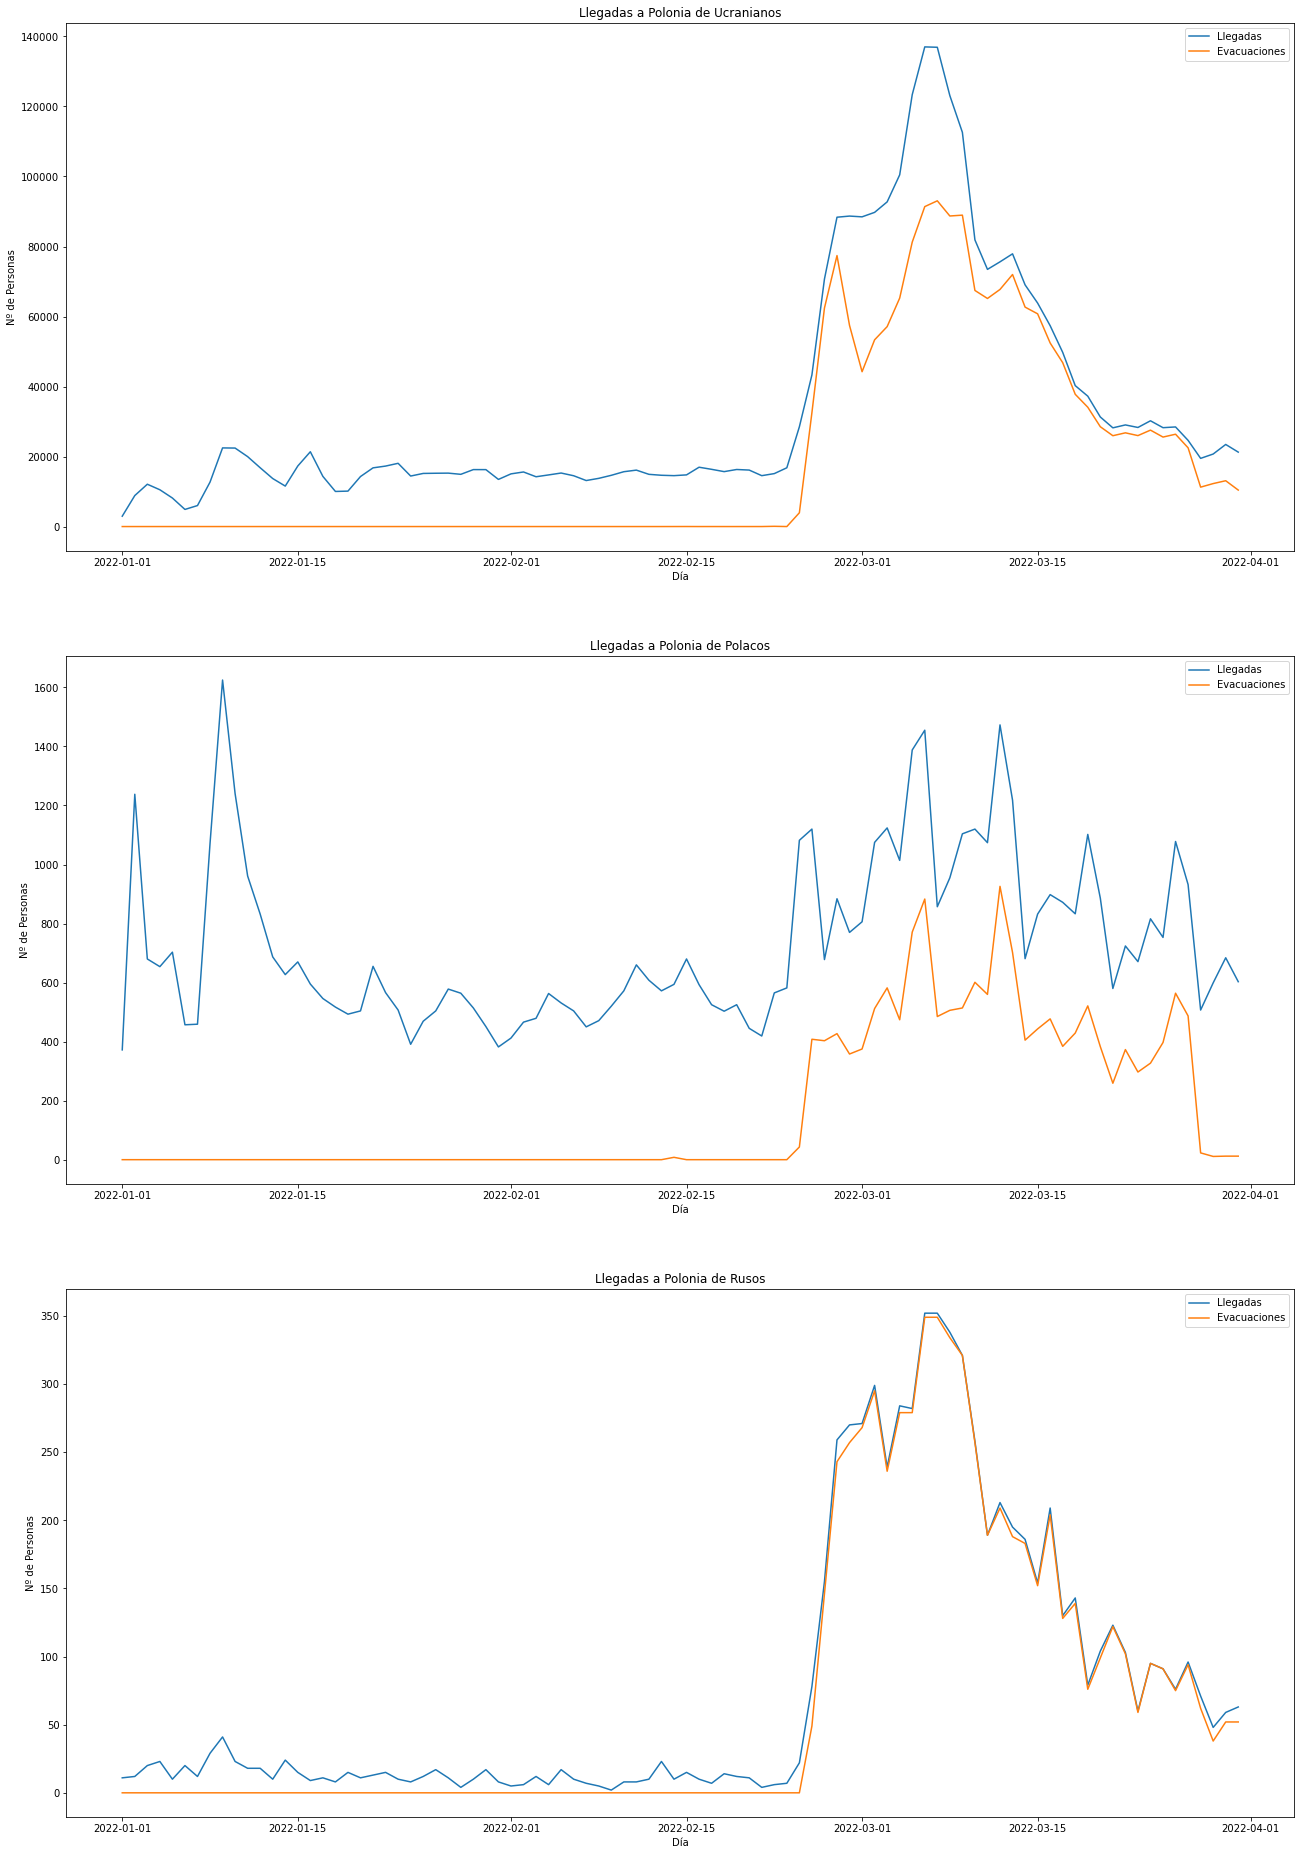

In [132]:
ua_arrived= arrivals[arrivals['Citizenship (code)']== 'UA']

pl_arrived = arrivals[arrivals['Citizenship (code)']== 'PL']

ru_arrived = arrivals[arrivals['Citizenship (code)']== 'RU']

ua_arrived = ua_arrived[['Date', 'Number of people (evacuated)','Number of persons (checked-in)']].groupby('Date').sum().reset_index()
pl_arrived = pl_arrived[['Date', 'Number of people (evacuated)','Number of persons (checked-in)']].groupby('Date').sum().reset_index()
ru_arrived = ru_arrived[['Date', 'Number of people (evacuated)','Number of persons (checked-in)']].groupby('Date').sum().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(22,33));

#Ucrania
axes[0].plot(ua_arrived.groupby('Date')['Number of persons (checked-in)'].sum())
axes[0].plot(ua_arrived.groupby('Date')['Number of people (evacuated)'].sum())
axes[0].set_title('Llegadas a Polonia de Ucranianos')
axes[0].set_xlabel('Día')
axes[0].set_ylabel('Nº de Personas')
axes[0].legend(['Llegadas', 'Evacuaciones'])

#Polonia
axes[1].plot(pl_arrived.groupby('Date')['Number of persons (checked-in)'].sum())
axes[1].plot(pl_arrived.groupby('Date')['Number of people (evacuated)'].sum())
axes[1].set_title('Llegadas a Polonia de Polacos')
axes[1].set_xlabel('Día')
axes[1].set_ylabel('Nº de Personas')
axes[1].legend(['Llegadas', 'Evacuaciones'])

#Rusia
axes[2].plot(ru_arrived.groupby('Date')['Number of persons (checked-in)'].sum())
axes[2].plot(ru_arrived.groupby('Date')['Number of people (evacuated)'].sum())
axes[2].set_title('Llegadas a Polonia de Rusos')
axes[2].set_xlabel('Día')
axes[2].set_ylabel('Nº de Personas')
axes[2].legend(['Llegadas', 'Evacuaciones'])

plt.show()


Se puede observar que la mayor parte de las llegadas a Polonia durante los días del conflicto se deben a ciudadanos Ucranianos. La dinámica temporal de la llegada de ciudadanos Ucranianos (y Rusos curiosamente) se ve obviamente influenciada por el conflicto ya que en ambos caso hay un claro aumento em el nº de personas, mientras que en las llegadas de ciudadanos polacos no se ve reflejado este aumento del número de llegadas.  

## 4. Conclusiones

Para finalizar esta serie de visualizaciones, recapitularemos resumiendo aquellos factores más importantes que nos muestran los datos.

El transporte más utilizado en la frontera entre Ucrania y Polonia es el transporte por carretera, siendo el tren el segundo más utilizado. Tanto por carretera como por tren, la mayor parte de las movilizaciones por dicha frontera se atribuyen a los ciudadanos Ucranianos. Observando las dinámicas temporales podemos observar que el repunte de llegadas a Polonia coincide con el del inicio del conflicto (26/02/2022), marcado por el número de evacuaciones. Después del inicio del conflicto, el número de llegadas a Polonia ha ido descendiendo lentamente hasta restablecerse a niveles normales.

Podemos ver que esta dinámica del incremento en el número de llegadas se atribuye principalmente a la llegada masiva de Ucranianos a la frontera de Polonia. 